# Black Scholes Model
Here I solve the Black scholes pde using Crank Nicolson method and compare it with the analytical solution. Also I do a Monte Carlo simulation of the stock price following a geometric Brownian motion and calculate the discounted mean of the option payoffs and compate it with the analytical value.

In [54]:
import numpy as np 
import matplotlib.pyplot as plt
from BS_CN_method import solve_bs, bs_analytical
from BS_MC_method import bs_mc_price

### Parameters of the model

In [55]:
# Parameters
T = 1
nS = 50
nt = 500
sigma = 0.1
r = 0.01
K = 90
S0 = 100
S_max = 2 * K

### Intial and Boundary conditions for the PDE

In [56]:
# Initial condition
def f_call(S):
    global K
    return np.maximum(S - K, 0)

def f_put(S):
    global K
    return np.maximum(K - S, 0)

# Right boundary
def gL_call(t):
    global S_max
    global r
    global K
    return S_max - K * np.exp(-r * t)

def gL_put(t):
    global S_max
    global r
    global K
    return 0

# Left boundary
def g0_call(t):
    return 0.0

def g0_put(t):
    return K * np.exp(-r * t)

### Solving the PDE Using Crank-Nicolson Method

In [60]:
S_call, V_call_final = solve_bs(f_call, g0_call, gL_call, S_max, T, nS, nt, sigma, r)
V_call_exact = bs_analytical(S=S_call, t=0, T=T, K=K, r=r, sigma=sigma, option="call")

S_put, V_put_final = solve_bs(f_put, g0_put, gL_put, S_max, T, nS, nt, sigma, r)
V_put_exact = bs_analytical(S=S_put, t=0, T=T, K=K, r=r, sigma=sigma, option="put")

### Ploting 

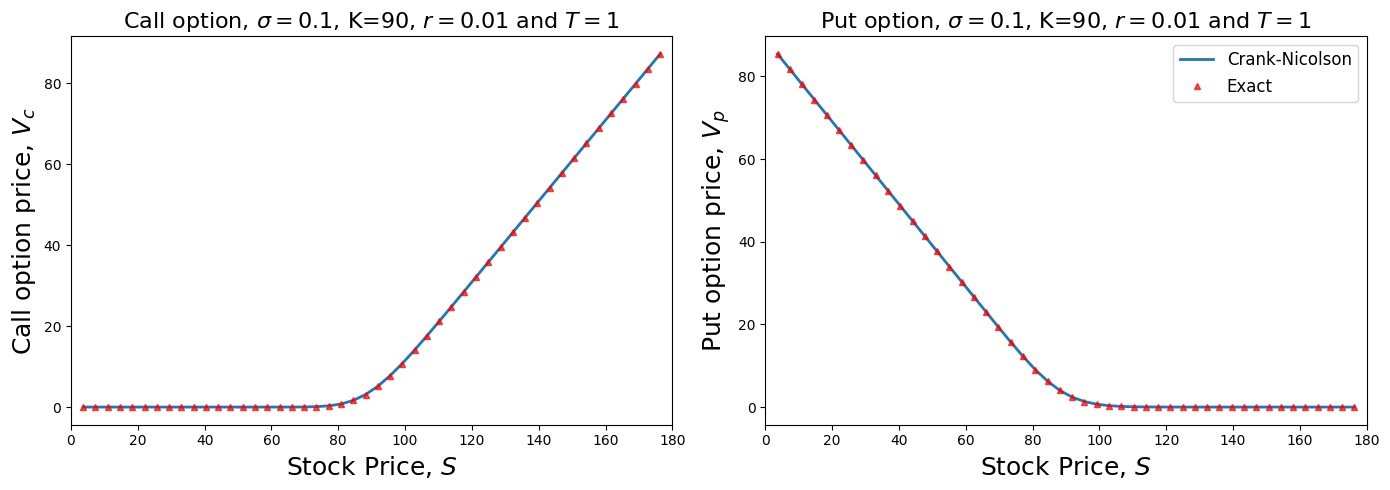

In [61]:

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax0, ax1 = axs.flatten()

ax0.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax0.set_ylabel(r"Call option price, $V_c$", fontsize=18)

ax0.plot(S_call, V_call_final, linewidth=2, label="Crank-Nicolson")
ax0.plot(S_call, V_call_exact, "r^", markersize=5, alpha=0.7, label="Exact")
ax0.set_title(
    f"Call option, $\\sigma={sigma}$, K={K}, $r={r}$ and $T={T}$", fontsize=16
)
ax0.set_xlim(0, S_max)

ax1.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax1.set_ylabel(r"Put option price, $V_p$", fontsize=18)

ax1.plot(S_put, V_put_final, linewidth=2, label="Crank-Nicolson")
ax1.plot(S_put, V_put_exact, "r^", markersize=5, alpha=0.7, label="Exact")
ax1.set_title(
    f"Put option, $\\sigma={sigma}$, K={K}, $r={r}$ and $T={T}$", fontsize=16
)
ax1.set_xlim(0, S_max)

ax1.legend(fontsize=12)
plt.tight_layout()
plt.show()

### Comparision of option prices for different sigmas

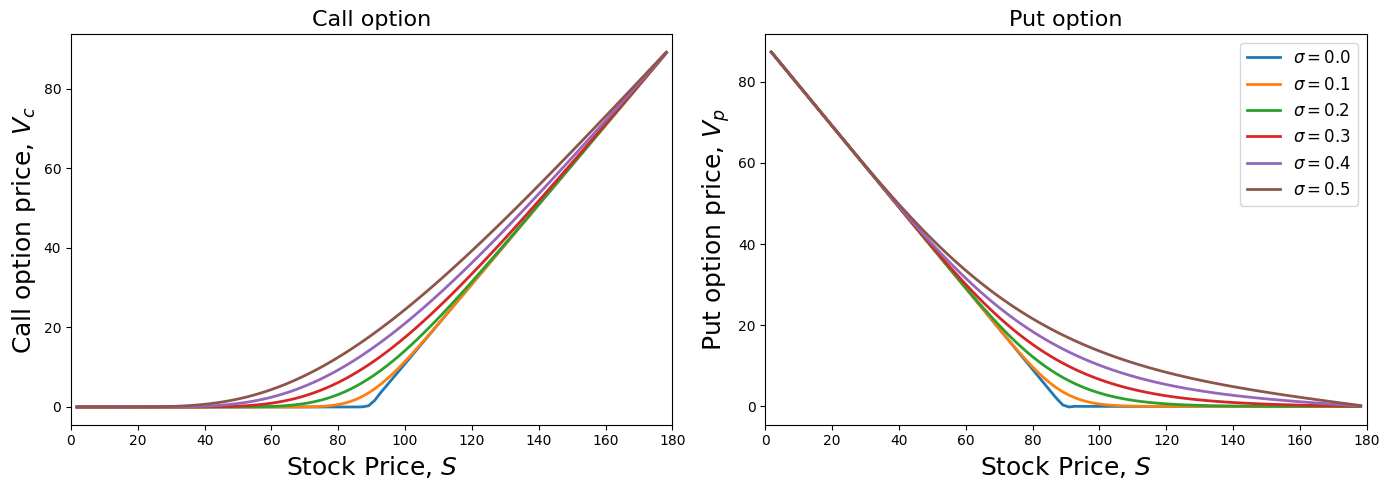

In [69]:
T = 1
nS = 100
nt = 500
r = 0.01
K = 90
S0 = 100
S_max = 2 * K

sigmas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax0, ax1 = axs.flatten()

ax0.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax0.set_ylabel(r"Call option price, $V_c$", fontsize=18)


ax0.set_title("Call option", fontsize=16)
ax0.set_xlim(0, S_max)

ax1.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax1.set_ylabel(r"Put option price, $V_p$", fontsize=18)
ax1.set_title("Put option", fontsize=16)
ax1.set_xlim(0, S_max)


for sig in sigmas:
    S_call, V_call_final = solve_bs(f_call, g0_call, gL_call, S_max, T, nS, nt, sig, r)
    V_call_exact = bs_analytical(S=S_call, t=0, T=T, K=K, r=r, sigma=sig, option="call")

    S_put, V_put_final = solve_bs(f_put, g0_put, gL_put, S_max, T, nS, nt, sig, r)
    V_put_exact = bs_analytical(S=S_put, t=0, T=T, K=K, r=r, sigma=sig, option="put")
    ax0.plot(S_call, V_call_final, linewidth=2)
    ax1.plot(S_put, V_put_final, linewidth=2, label=f"$\\sigma=${sig}")

ax1.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Comparision of option prices with different maturity

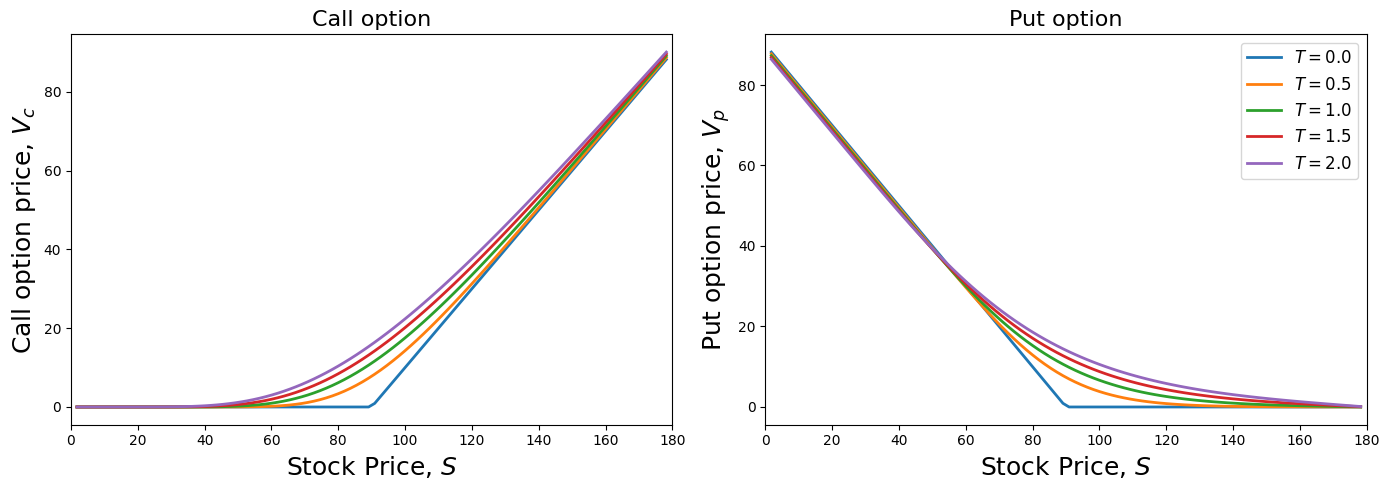

In [74]:
Ts = [0.0, 0.5, 1.0 , 1.5, 2.0]
nS = 100
nt = 500
r = 0.01
K = 90
S0 = 100
S_max = 2 * K

sigma = 0.3

fig, axs = plt.subplots(1, 2, figsize=(14, 5))
ax0, ax1 = axs.flatten()

ax0.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax0.set_ylabel(r"Call option price, $V_c$", fontsize=18)


ax0.set_title("Call option", fontsize=16)
ax0.set_xlim(0, S_max)

ax1.set_xlabel(r"Stock Price, $S$", fontsize=18)
ax1.set_ylabel(r"Put option price, $V_p$", fontsize=18)
ax1.set_title("Put option", fontsize=16)
ax1.set_xlim(0, S_max)


for expiry in Ts:
    S_call, V_call_final = solve_bs(f_call, g0_call, gL_call, S_max, expiry, nS, nt, sigma, r)
    S_put, V_put_final = solve_bs(f_put, g0_put, gL_put, S_max, expiry, nS, nt, sigma, r)

    ax0.plot(S_call, V_call_final, linewidth=2)
    ax1.plot(S_put, V_put_final, linewidth=2, label=f"$T=${expiry}")

ax1.legend(fontsize=12)

plt.tight_layout()
plt.show()

### Monte Carlo simulation

In [75]:
# Parameters
S0 = 100
K = 90
r = 0.01
sigma = 0.1
T = 1

In [76]:
mc_price, err = bs_mc_price(S0=S0, K=K, r=r, sigma=sigma, T=T, n_paths=1000000, option='call', random_seed=13)

bs_price = bs_analytical(S=S0, t=0, T=T, K=K, r=r, sigma=sigma, option='call')

In [77]:
print(f"MC price  = {mc_price:.6f}")
print(f"BS price  = {bs_price:.6f}\n")
print(f"95% Confidence Interval = [{mc_price-1.96*err:.6f}, " f"{mc_price+1.96*err:.6f}]")

MC price  = 11.466091
BS price  = 11.477015

95% Confidence Interval = [11.448231, 11.483951]
